# Pygwinc SuperQK Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwinc
from copy import deepcopy

In [2]:
budget = gwinc.load_budget("L1_uns_PRX.yaml")
ifo = budget.ifo # it takes the information out of the yaml file

In [4]:
ifo1 = deepcopy(ifo)
ifo2 = deepcopy(ifo)

In [22]:
freq = np.geomspace(20, 1000, 1000)
traces = gwinc.load_budget("L1_uns_PRX.yaml").run(freq=freq)

In [4]:
traces.Quantum

<BudgetTrace Quantum [RelASSqz, RelASMisrotation, XiDephase, XiBroadBand, XiFC, XiSEC, MM, Arm, SEC, FilterCavity, Injection, Readout]>

In [29]:
traces = budget.run()
traces1 = budget.run(ifo=ifo1) # Or you can also make another copy of budget

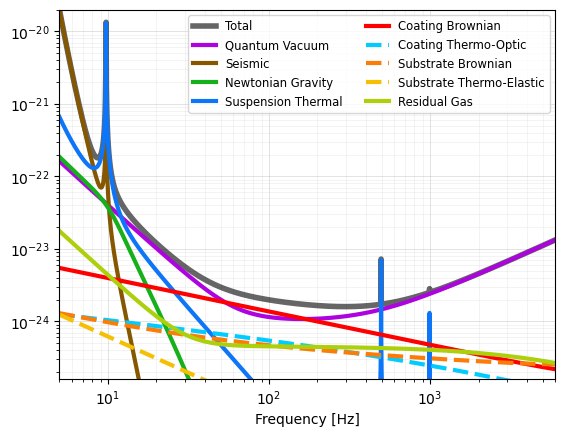

In [4]:
fig = traces.plot()

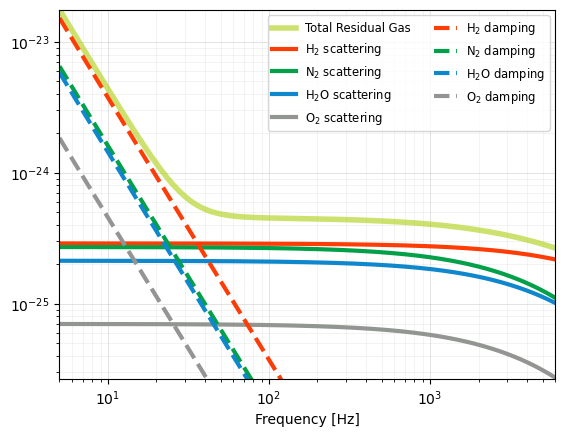

In [8]:
fig = traces1.ResidualGas.plot()

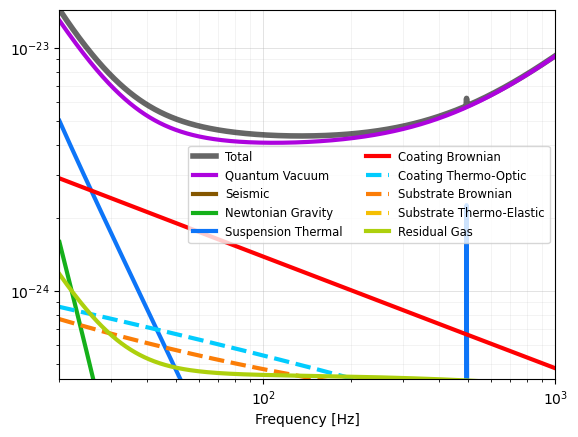

In [24]:
fig = traces.plot()

In [6]:
traces.asd

array([2.00023697e-20, 1.94531059e-20, 1.89198305e-20, ...,
       1.32649309e-23, 1.32963425e-23, 1.33278305e-23])

g:\my drive\ligo\superqk\pygwinc\gwinc\trace.py:42: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self._psd)


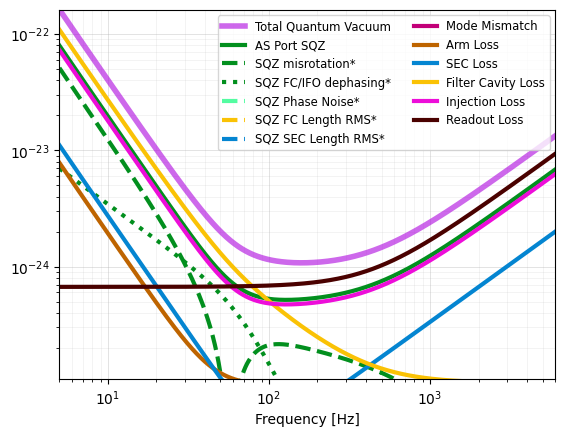

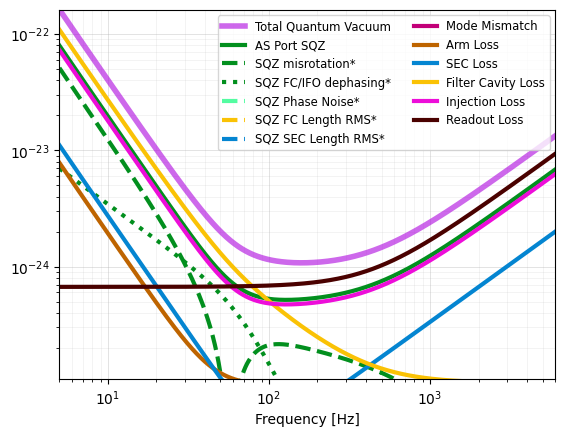

In [3]:
import gwinc
budget = gwinc.load_budget('Aplus')
traces = budget.run()
traces.Quantum.plot()

In [10]:
traces.Quantum.RelASSqz.asd

array([7.95161133e-23, 7.91341835e-23, 7.87541212e-23, ...,
       6.81534177e-24, 6.83150585e-24, 6.84770921e-24])

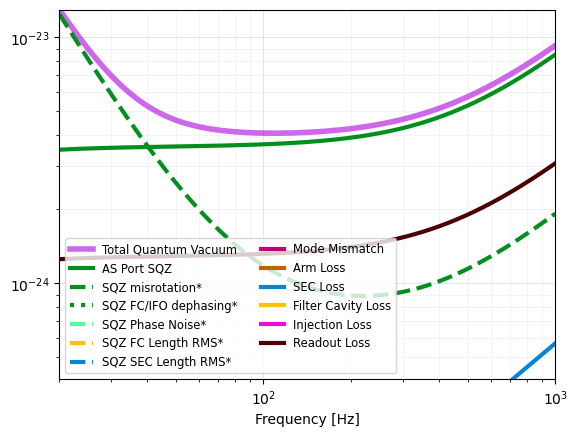

In [9]:
traces.Quantum.plot();

In [3]:
POWER = 310e3
src_det = 0.1
LOang = -14
freq = freq = np.geomspace(20, 1000, 1000)
budget = gwinc.load_budget("Aplus", freq,bname="Quantum")
ifo = budget.ifo
del ifo.Laser.Power
ifo.Laser.ArmPower = POWER
ifo.Optics.SRM.Tunephase = np.pi*src_det/180
del ifo.Squeezer.FilterCavity
del ifo.Squeezer
ifo.Optics.Quadrature.dc = np.pi/2+LOang*np.pi/180
ifo.Optics.PhotoDetectorEfficiency =  1

In [20]:
Y = traces.Quantum.asd
np.savetxt('L1_uns_PRX.txt', np.vstack((freq, Y)).T)   # x,y,z equal sized 1D arrays

/home/wenxuan.jia/IFOsim/pygwinc/gwinc/trace.py:42: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self._psd)


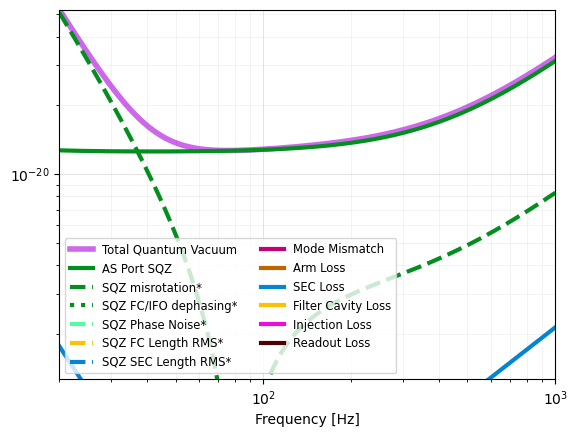

In [4]:
freq = np.geomspace(20, 1000, 1000)
traces = budget.run(freq=freq)
traces.plot();

/local/wenxuan.jia/ipykernel_2453367/1724484349.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


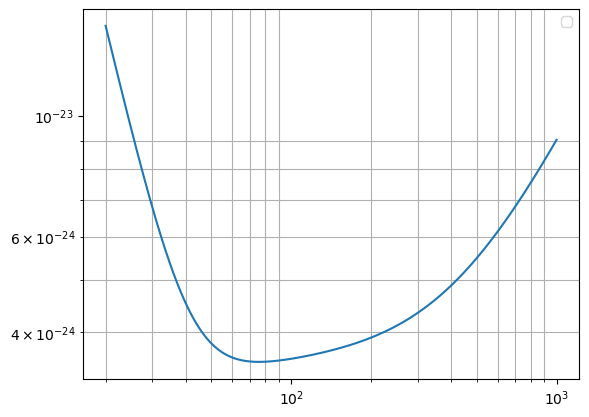

In [8]:
no_sqz_model = np.sqrt(traces.psd)/4000*1/(0.898)
fig, ax = plt.subplots()
ax.loglog(freq, no_sqz_model, label="")
plt.grid(b=True, which='minor')
ax.legend()

In [13]:
traces.Quantum.asd

array([4.01641292e-23, 3.54312332e-23, 3.12610940e-23, 2.75864571e-23,
       2.43482112e-23, 2.14943831e-23, 1.89792605e-23, 1.67626270e-23,
       1.48090936e-23, 1.30875140e-23, 1.15704729e-23, 1.02338372e-23,
       9.05636329e-24, 8.01935142e-24, 7.10634342e-24, 6.30285637e-24,
       5.59614871e-24, 4.97501424e-24, 4.42960029e-24, 3.95124683e-24,
       3.53234315e-24, 3.16619935e-24, 2.84692983e-24, 2.56934626e-24,
       2.32885829e-24, 2.12138082e-24, 1.94324831e-24, 1.79113827e-24,
       1.66200768e-24, 1.55304649e-24, 1.46165139e-24, 1.38541923e-24,
       1.32215555e-24, 1.26988970e-24, 1.22688782e-24, 1.19165696e-24,
       1.16293771e-24, 1.13968669e-24, 1.12105250e-24, 1.10634907e-24,
       1.09502973e-24, 1.08666384e-24, 1.08091703e-24, 1.07753489e-24,
       1.07632997e-24, 1.07717147e-24, 1.07997709e-24, 1.08470665e-24,
       1.09135704e-24, 1.09995826e-24, 1.11057020e-24, 1.12328006e-24,
       1.13820023e-24, 1.15546644e-24, 1.17523621e-24, 1.19768738e-24,
      

In [14]:
budget.ifo

Struct({'Infrastructure': Struct({'Length': 3995,
                'Temp': 290,
                'ResidualGas': Struct({'H2': Struct({'BeamtubePressure': 2.7e-07,
                                'ChamberPressure': 2.7e-07,
                                'mass': 3.35e-27,
                                'polarizability': 7.8e-31}),
                        'N2': Struct({'BeamtubePressure': 1.33e-08,
                                'ChamberPressure': 1.33e-08,
                                'mass': 4.65e-26,
                                'polarizability': 1.71e-30}),
                        'H2O': Struct({'BeamtubePressure': 1.33e-08,
                                'ChamberPressure': 1.33e-08,
                                'mass': 2.99e-26,
                                'polarizability': 1.5e-30}),
                        'O2': Struct({'BeamtubePressure': 1e-09,
                                'ChamberPressure': 1e-09,
                                'mass': 5.31e-26,
             

In [15]:
budget.ifo.Squeezer

Struct({'Type': 'Freq Dependent',
        'AmplitudedB': 12,
        'InjectionLoss': 0.05,
        'SQZAngle': 0,
        'LOAngleRMS': 0.03,
        'FilterCavity': Struct({'L': 300,
                'Te': 1e-06,
                'Lrt': 6e-05,
                'Rot': 0,
                'fdetune': -45.78,
                'Ti': 0.0012})})

In [16]:
budget.ifo.Squeezer.InjectionLoss = 0.01

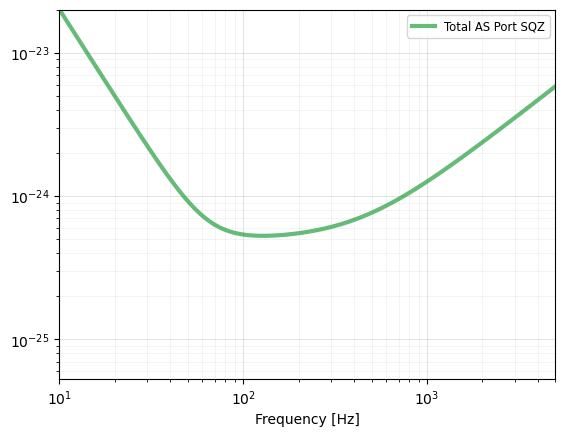

In [22]:
traces2 = budget.run() # freq is remembered of the last time
fig = traces2.Quantum.RelASSqz.plot()


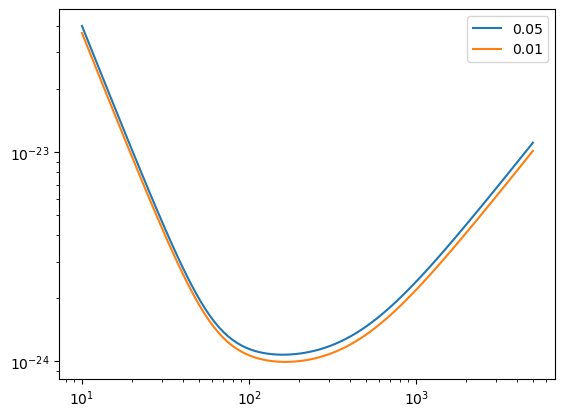

In [11]:
ifo1.Squeezer.InjectionLoss = 0.05
ifo2.Squeezer.InjectionLoss = 0.01

freq = np.geomspace(10, 5000, 100)
traces1 = budget.run(freq=freq, ifo=ifo1)
traces2 = budget.run(freq=freq, ifo=ifo2)

fig, ax = plt.subplots()
ax.loglog(freq, traces1.Quantum.asd, label="0.05")
ax.loglog(freq, traces2.Quantum.asd, label="0.01")
ax.legend()


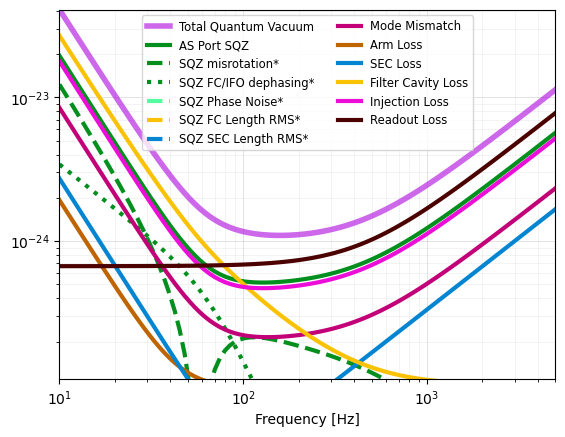

In [14]:
budget2 = gwinc.load_budget("mm_opo2fc.yaml")

traces3 = budget2.run(freq=freq)

fig = traces3.Quantum.plot()

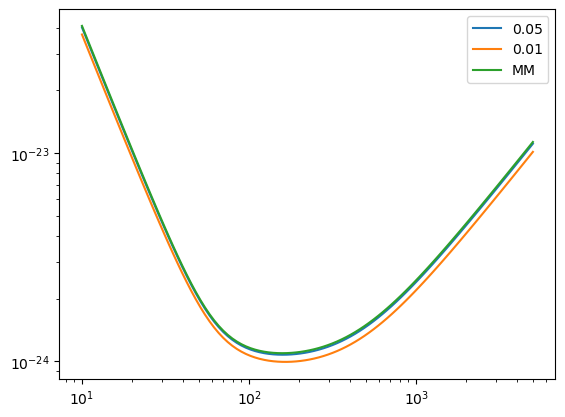

In [16]:
fig, ax = plt.subplots()
ax.loglog(freq, traces1.Quantum.asd, label="0.05")
ax.loglog(freq, traces2.Quantum.asd, label="0.01")
ax.loglog(freq, traces3.Quantum.asd, label="MM")
ax.legend()

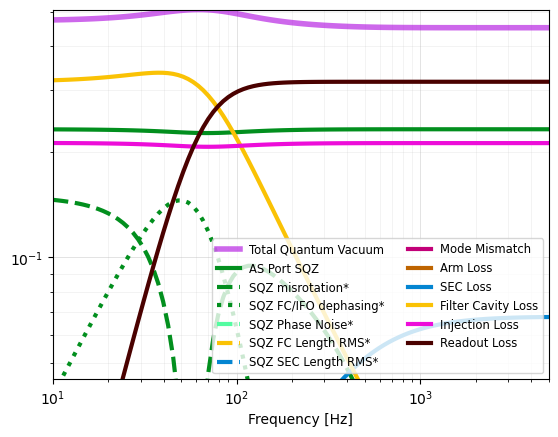

In [22]:
# plot relative sqz in dB
budget_rg = gwinc.load_budget("Aplus", bname="QuantumRelGamma")

traces_rg = budget_rg.run(freq=freq)
traces_rg.plot();

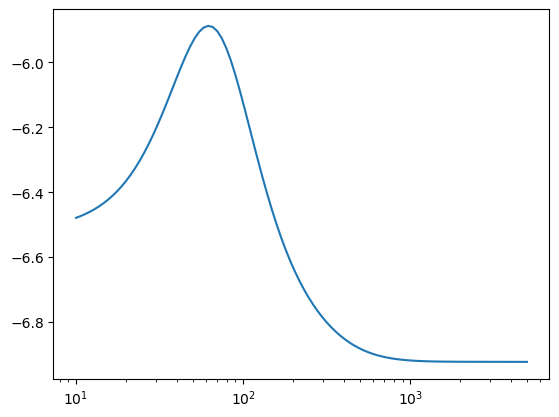

In [23]:
noise = traces_rg.psd;
noisedb = 10*np.log10(noise)


fig, ax = plt.subplots()
ax.semilogx(freq, noisedb)

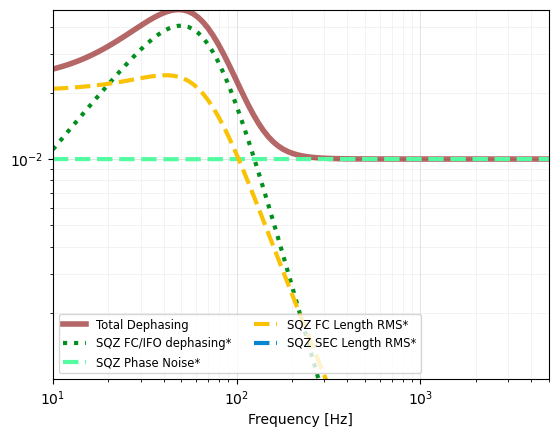

In [27]:
# plot phase noise budgeting
budget_rg = gwinc.load_budget("mm_opo2fc.yaml", bname="QuantumXi")

traces_rg = budget_rg.run(freq=freq)
traces_rg.plot();

## List of mode-mismatch parameters to be used

SEC length RMS: ifo.Optics.SRM.LengthRMS

roundtrip SEC detuning: ifo.Optics.SRM.Tunephase

SEC Gouy phase of the HOM: ifo.Optics.SRM.SRCGouy_rad

mode mismatch between arms and SEC: ifo.Optics.MM_ARM_SRC

mode mismatch phase between arms and SEC:  ifo.MM_ARM_SRCphi

mode mismatch between IFO and OMC: ifo.Optics.MM_IFO_OMC

mode mismatch phase between IFO and OMC: ifo.Optics.MM_IFO_OMCphi

mode mismatch between squeezer and OMC: ifo.Squeezer.MM_SQZ_OMC

mode mismatch phase between squeezer and OMC: ifo.Squeezer.MM_SQZ_OMCphi

mode mismatch between squeezer and filter cavity: ifo.Squeezer.FilterCavity.L_mm

mode mismatch phase between squeezer and filter cavity: ifo.Squeezer.FilterCavity.psi_mm

filter cavity Gouy phase: ifo.Squeezer.FilterCavity.Gouy_rad

filter cavity length RMS: ifo.Squeezer.FilterCavity.Lrms

ifo.Squeezer.direct_mm_sqz_ifo controls whether MM_SQZ_OMC is the mismatch between the squeezer and the OMC (False, the default) or is the mismatch between the squeezer and the interferometer (True). Another way to say it is that it's Upsilon_F if False and Upsilon_I if True in the notation of section VI of
https://journals.aps.org/prd/abstract/10.1103/PhysRevD.104.062006

ifo.Optics.is_OPD controls whether the MM_ARM_SRC mismatch is a quadratic mismatch (False, the default) or whether it's an optical path length distortion (True).
